# Library

In [1]:
# 구글 드라이브 연결
from google.colab import drive
drive.mount('/content/drive')

# 라이브러리 설치
!pip install --upgrade --no-cache-dir numpy seaborn
!pip install ydata_profiling
!pip install missingno
!pip install tqdm

!pip install -U kss==5.2.0
!pip install kiwipiepy
!pip install soynlp
!pip install keybert
!pip install keybert[gensim]
!pip install sentence_transformers

!pip install nltk
!pip install konlpy
!pip install gensim
!pip install bertopic -U
!pip install bertopic[visualization] -U
!pip install -U accelerate
!pip install -U transformers
!pip install datasets

!pip install catboost
!pip install tensorflow==2.15 keras==2.15
!pip install keras-tqdm
!pip install shap

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 224.2 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.15.0 requires numpy<2.0.0,>=1.23.5, but you have numpy 2.2.4 which is incompatible.
ydata-profiling 4.16.1 requires numpy<2.2,>=1.16.0, but you have numpy 2.2.4 which is incompatible.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.2.4 which is incompatible.
catboost 1.2.7 requires numpy<2.0,>=1.16.0, but you have numpy 2.2.4 which is incompatible.
tensor

In [2]:
# Auto reload of library
%load_ext autoreload
%autoreload 2

# System related and data input controls
import os

# Ignore the warnings
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)
warnings.simplefilter(action='ignore', category=RuntimeWarning)

# Visualization
import matplotlib
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
## 한글 폰트 설치
!apt-get update -qq
!apt-get install fonts-nanum* -qq
## NanumGothic 폰트 경로 지정
fm.fontManager.addfont('/usr/share/fonts/truetype/nanum/NanumGothic.ttf')
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_prop = fm.FontProperties(fname=font_path)
## 한글 폰트 설정
matplotlib.rcParams['font.family'] = font_prop.get_name()
plt.rc('font', family='NanumGothic')
sns.set(font=font_prop.get_name())
## 마이너스 표시 설정
plt.rcParams['axes.unicode_minus'] = False

# Custom
## 사용자의 실제 작업경로로 설정!
work_path = '/content/drive/MyDrive/Research/Analysis/Lecture/특강_20250412_한국지능정보사회진흥원_빅데이터센터'
os.chdir(work_path)
!ls
from module_KK import *

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
 BA1_TargetMarketing_DataPreprocessing_KK.ipynb
 BA1_TargetMarketing_ModelingAI_KK.ipynb
 BA1_TargetMarketing_ModelingBase_KK.ipynb
 BA2_DemandForecasting_DataPreprocessing_KK.ipynb
 BA2_DemandForecasting_DataSentiment_KK.ipynb
 BA2_DemandForecasting_ModelingAI_KK.ipynb
 Data
 Image
 Lecture2-0_DataAnalysis_RealDataAnalysis_KK.ipynb
 Lecture2-1_DataAnalysis_LearningAlgorithm_KK.ipynb
 Lecture2-2_DataAnalysis_SupervisedRegression_KK.ipynb
 Lecture2-3_DataAnalysis_SupervisedClassification_KK.ipynb
 Lecture3-1_MachineLearning_SupervisedEvolutionSummary_KK.ipynb
 Lecture4-1_DeepLearning_HistoryAI_KK.ipynb
 Lecture4-2_DeepLearning_AdvancedAI_KK.ipynb
 Lecture4-3_DeepLearning_BaseAlgorithms_KK.ipynb
 mlruns
 Model
 model.png
 module_KK.py
 outputs
 Practice2-3_DataAnalysis_SupervisedClassification_KK.ipynb

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# Hyperparameter

In [3]:
# Data Preprocessing
file_location = os.path.join(os.path.join('.', 'Data', 'df_concat_BA1.csv'))
Y_colname = '기부여부'
TEST_SIZE = 0.2
RANDOM_STATE = 123
SAMPLING_METHOD = 'RandomUnderSampler'
SAMPLING_STRATEGY = 'auto'
SCALER = MinMaxScaler()
LABEL_LIST = ['Non-donation', 'Donation']

# Modeling AI
## DL
tf.random.set_seed(123)
KERNEL_SIZE = 5
STRIDE = 1
PADDING = 'same'
POOL_SIZE = 2
POOL_STRIDE = 2
HIDDEN_ACTIVATION = 'relu'
OUTPUT_ACTIVATION = 'sigmoid'
REGULARIZER = regularizers.l2(0.001)
DROPOUT_RATIO = 0.25
WEIGHT_METHOD = 'sample'   # None, 'class', 'sample'
if WEIGHT_METHOD != None:
    LOSS = 'categorical_crossentropy'
else:
    LOSS = 'sparse_categorical_crossentropy'
OPTIMIZER = 'adam'
METRICS = [keras.metrics.F1Score(name='F1-score'),
           keras.metrics.Accuracy(name='Accuracy'),
           keras.metrics.AUC(name='AUC')]
VALIDATION_SPLIT = None
BATCH_SIZE = 64
EPOCHS = 10
VERBOSE = 2
MONITOR = 'val_f1'    # 'val_accuracy', 'val_precision', 'val_recall', 'val_f1', 'val_loss'
MONITOR_MODE = 'max'
EARLYSTOP_PATIENT = int(EPOCHS*0.2)
## SHAP
OUTPUT_TYPE = 'logit'
MAX_DISPLAY = 30
DEPENDENCY = True

# BA Process Summary

```python
# 데이터분석 프로세스
## 데이터 로딩
df = pd.read_csv(file_location, encoding='utf-8-sig')
## 데이터 전처리
X_train, X_test, Y_train, Y_test, df_prep = preprocessing_MDIS_KK(df)
X_colname = [col for col in df_prep.columns if col != Y_colname]
## 결과 확인
print(X_train.shape, Y_train.shape, X_train.min(), X_train.max())
print(X_test.shape, Y_test.shape, X_test.min(), X_test.max())
print('Complete!')

# Logistic Regression
model = LogisticRegression(fit_intercept=True, class_weight='balanced')
model.fit(X_train, Y_train)

# Explanation
explanation_SHAP_KK(model, X_train, X_test, X_colname,
                    MAX_DISPLAY=MAX_DISPLAY, model_type='linear',
                    link=OUTPUT_TYPE, sample_size=1,
                    sample_size_1000=1000,
                    plot_interaction=True)

# Evaluation
Score_te, Score_trte = prediction_class(model, X_train, Y_train, X_test, Y_test,
                                        LABEL_LIST=LABEL_LIST, ALGO_NAME='Logistic')
display(Score_te, Score_trte)
```

# Prediction Explanation

In [4]:
# 데이터분석 프로세스
## 데이터 로딩
df = pd.read_csv(file_location, encoding='utf-8-sig')
## 데이터 전처리
X_train, X_test, Y_train, Y_test, df_prep = preprocessing_MDIS_KK(df)
X_colname = [col for col in df_prep.columns if col != Y_colname]
## 결과 확인
print(X_train.shape, Y_train.shape, X_train.min(), X_train.max())
print(X_test.shape, Y_test.shape, X_test.min(), X_test.max())
print('Complete!')

(86520, 148) (86520, 1) 0.0 1.0000000000000004
(21630, 148) (21630, 1) 0.0 1.0000000000000004
Complete!


```python
## 만약 1의 예측 성능을 높이기 위해 샘플링을 한다면?
from imblearn.under_sampling import RandomUnderSampler
sampler = RandomUnderSampler(sampling_strategy='auto', random_state=RANDOM_STATE)
X_train, Y_train = sampler.fit_resample(X_train, Y_train)
```

## 1) Logistic Regression

Performance: 


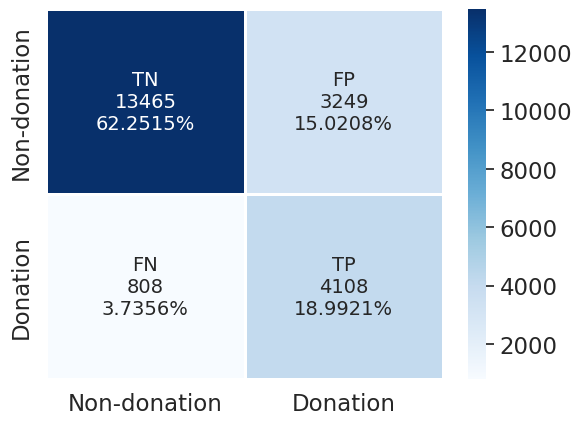

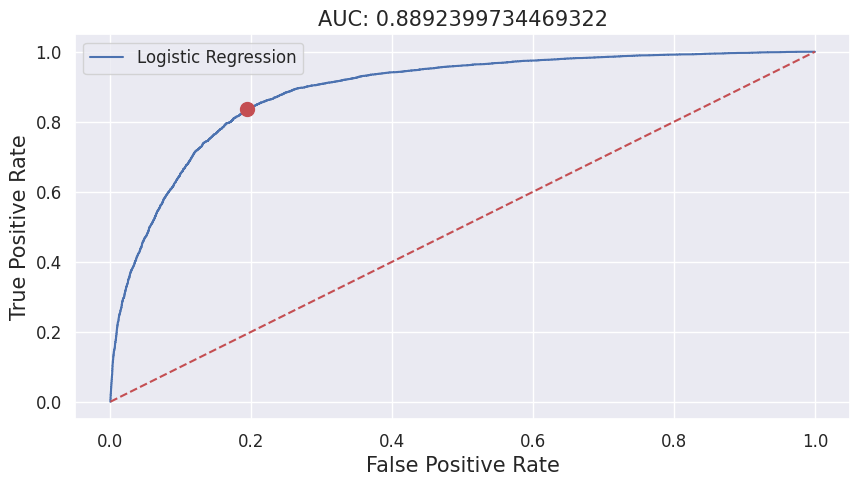

,N,True Positive,True Negative,False Positive,False Negative,Precision,Recall,Specificity,F1-score,Accuracy,Balanced Accuracy,AUC
Test set,21630,4108,13465,3249,808,0.55838,0.835639,0.805612,0.669437,0.812436,0.820625,0.88924


,N,True Positive,True Negative,False Positive,False Negative,Precision,Recall,Specificity,F1-score,Accuracy,Balanced Accuracy,AUC
Entire population,108150,20953,66599,16573,4025,0.55836,0.838858,0.800738,0.670453,0.809542,0.819798,0.890385


In [5]:
# Logistic Regression
model = LogisticRegression(fit_intercept=True, class_weight='balanced')
model.fit(X_train, Y_train)

# Prediction & Evaluation
Score_te, Score_trte = prediction_class(model, X_train, Y_train, X_test, Y_test,
                                        LABEL_LIST=LABEL_LIST, ALGO_NAME='Logistic Regression')
display(Score_te, Score_trte)

## 2) Random Forest

Performance: 


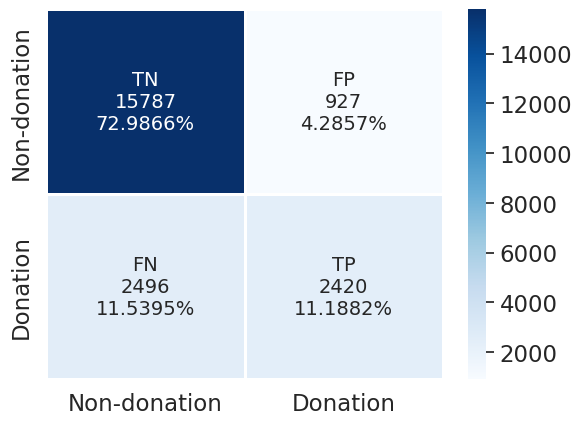

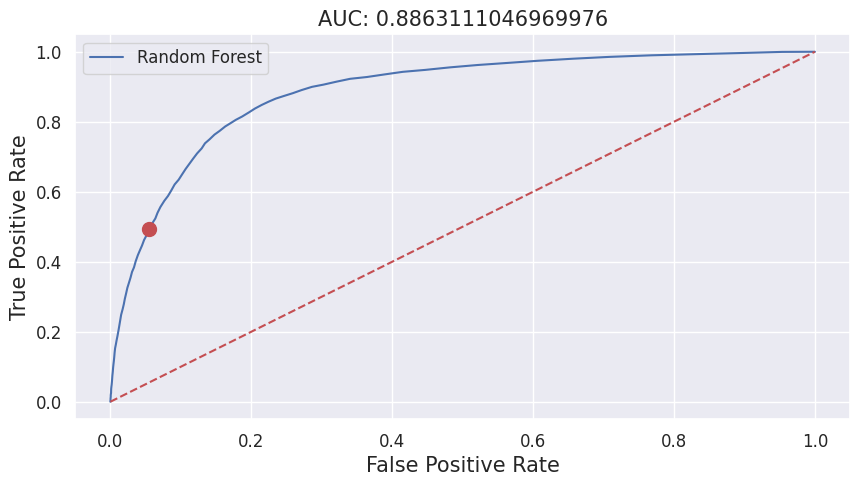

,N,True Positive,True Negative,False Positive,False Negative,Precision,Recall,Specificity,F1-score,Accuracy,Balanced Accuracy,AUC
Test set,21630,2420,15787,927,2496,0.723036,0.49227,0.944538,0.585744,0.841748,0.718404,0.886311


,N,True Positive,True Negative,False Positive,False Negative,Precision,Recall,Specificity,F1-score,Accuracy,Balanced Accuracy,AUC
Entire population,108150,22482,82245,927,2496,0.9604,0.900072,0.988854,0.929258,0.96835,0.944463,0.99062


In [6]:
# Random Forest
model = RandomForestClassifier(n_estimators=100,
                               class_weight='balanced',   # 'balanced_subsample'
                               random_state=123)
model.fit(X_train, Y_train)

# Prediction & Evaluation
Score_te, Score_trte = prediction_class(model, X_train, Y_train, X_test, Y_test,
                                        LABEL_LIST=LABEL_LIST, ALGO_NAME='Random Forest')
display(Score_te, Score_trte)

## 3) XGBoost

Performance: 


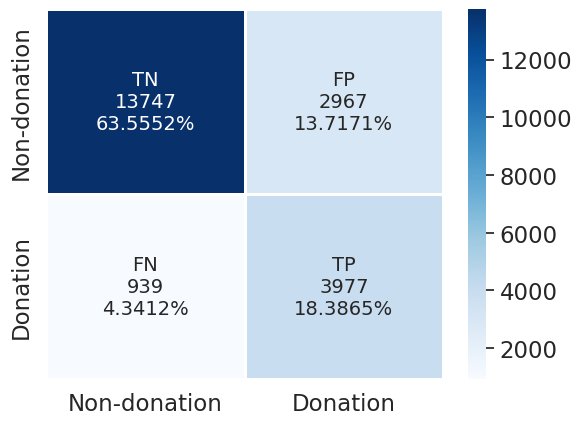

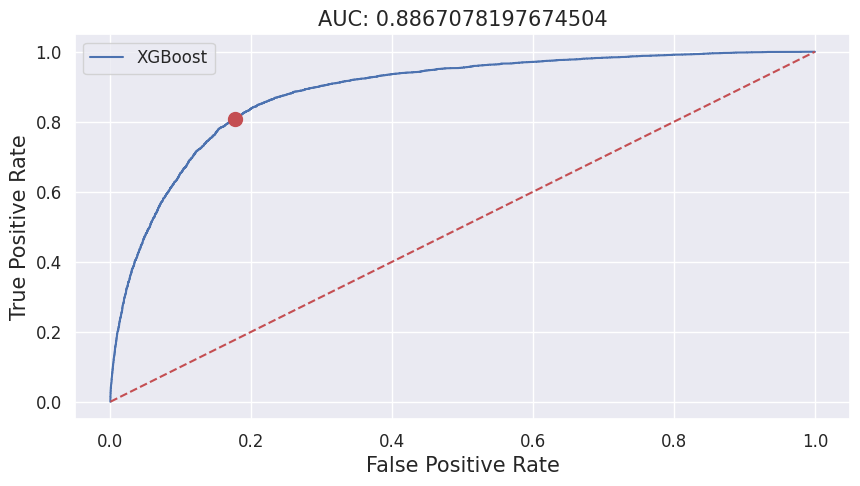

,N,True Positive,True Negative,False Positive,False Negative,Precision,Recall,Specificity,F1-score,Accuracy,Balanced Accuracy,AUC
Test set,21630,3977,13747,2967,939,0.572725,0.808991,0.822484,0.670658,0.819417,0.815738,0.886708


,N,True Positive,True Negative,False Positive,False Negative,Precision,Recall,Specificity,F1-score,Accuracy,Balanced Accuracy,AUC
Entire population,108150,22079,70128,13044,2899,0.628619,0.883938,0.843168,0.73473,0.852584,0.863553,0.934898


In [7]:
# XGBoost
model = XGBClassifier(n_estimators=100,
                      scale_pos_weight=Y_train.value_counts()[0]/Y_train.value_counts()[1],   # binary
                      random_state=123)
model.fit(X_train, Y_train)

# Prediction & Evaluation
Score_te, Score_trte = prediction_class(model, X_train, Y_train, X_test, Y_test,
                                        LABEL_LIST=LABEL_LIST, ALGO_NAME='XGBoost')
display(Score_te, Score_trte)

## 4) LightGBM

[LightGBM] [Info] Number of positive: 20062, number of negative: 66458
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.052809 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 706
[LightGBM] [Info] Number of data points in the train set: 86520, number of used features: 148
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
Performance: 


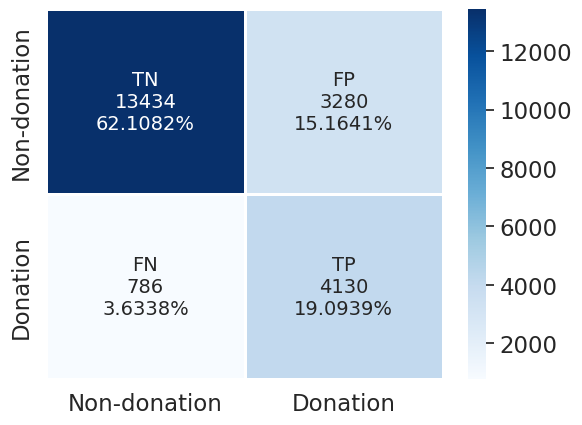

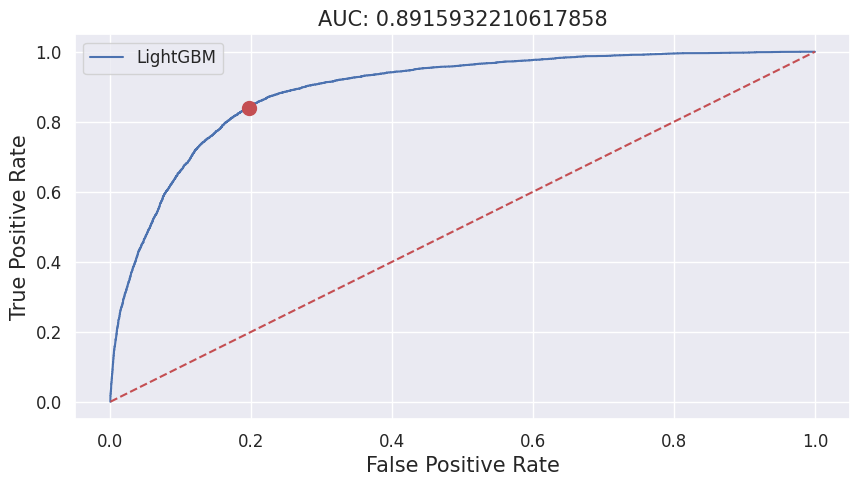

,N,True Positive,True Negative,False Positive,False Negative,Precision,Recall,Specificity,F1-score,Accuracy,Balanced Accuracy,AUC
Test set,21630,4130,13434,3280,786,0.557355,0.840114,0.803757,0.670128,0.81202,0.821936,0.891593


,N,True Positive,True Negative,False Positive,False Negative,Precision,Recall,Specificity,F1-score,Accuracy,Balanced Accuracy,AUC
Entire population,108150,21449,66859,16313,3529,0.568005,0.858716,0.803864,0.683742,0.816533,0.83129,0.90623


In [8]:
# LGBM
model = LGBMClassifier(n_estimators=100,
                       class_weight='balanced',
                       random_state=123)
model.fit(X_train, Y_train)

# Prediction & Evaluation
Score_te, Score_trte = prediction_class(model, X_train, Y_train, X_test, Y_test,
                                        LABEL_LIST=LABEL_LIST, ALGO_NAME='LightGBM')
display(Score_te, Score_trte)

## 5) CatBoost

Learning rate set to 0.5
0:	learn: 0.4882373	total: 151ms	remaining: 14.9s
1:	learn: 0.4438618	total: 223ms	remaining: 10.9s
2:	learn: 0.4315003	total: 320ms	remaining: 10.3s
3:	learn: 0.4260552	total: 414ms	remaining: 9.93s
4:	learn: 0.4217527	total: 475ms	remaining: 9.03s
5:	learn: 0.4195017	total: 567ms	remaining: 8.88s
6:	learn: 0.4165377	total: 660ms	remaining: 8.76s
7:	learn: 0.4151350	total: 757ms	remaining: 8.71s
8:	learn: 0.4139016	total: 846ms	remaining: 8.55s
9:	learn: 0.4131807	total: 935ms	remaining: 8.41s
10:	learn: 0.4123613	total: 1.01s	remaining: 8.15s
11:	learn: 0.4115197	total: 1.08s	remaining: 7.93s
12:	learn: 0.4109458	total: 1.16s	remaining: 7.75s
13:	learn: 0.4104666	total: 1.23s	remaining: 7.57s
14:	learn: 0.4098199	total: 1.33s	remaining: 7.52s
15:	learn: 0.4092303	total: 1.39s	remaining: 7.32s
16:	learn: 0.4086075	total: 1.48s	remaining: 7.23s
17:	learn: 0.4080855	total: 1.55s	remaining: 7.08s
18:	learn: 0.4076111	total: 1.63s	remaining: 6.95s
19:	learn: 0.406

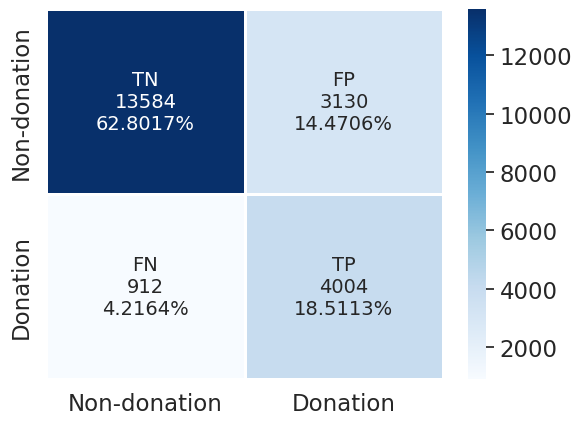

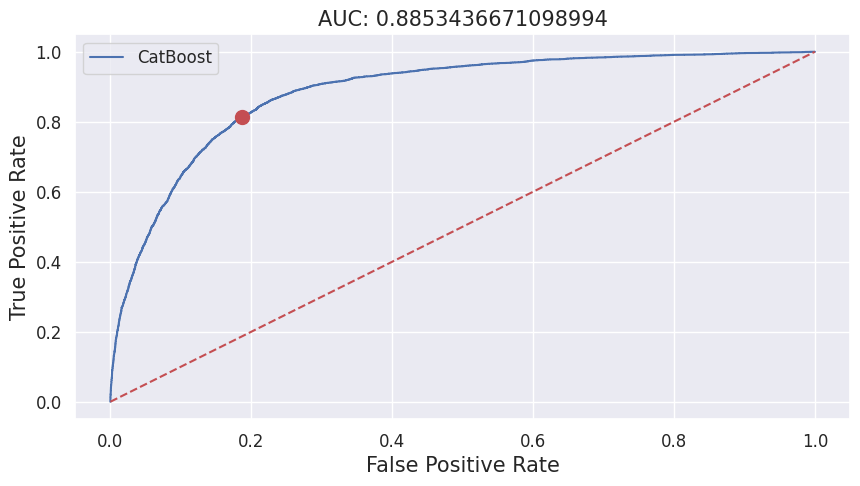

,N,True Positive,True Negative,False Positive,False Negative,Precision,Recall,Specificity,F1-score,Accuracy,Balanced Accuracy,AUC
Test set,21630,4004,13584,3130,912,0.561256,0.814483,0.812732,0.664564,0.81313,0.813608,0.885344


,N,True Positive,True Negative,False Positive,False Negative,Precision,Recall,Specificity,F1-score,Accuracy,Balanced Accuracy,AUC
Entire population,108150,21520,68371,14801,3458,0.592495,0.861558,0.822043,0.702132,0.83117,0.841801,0.914937


In [9]:
# CatBoost
model = CatBoostClassifier(n_estimators=100,
                           auto_class_weights='Balanced',
                           allow_writing_files=False,
                           random_state=123)
model.fit(X_train, Y_train)

# Prediction & Evaluation
Score_te, Score_trte = prediction_class(model, X_train, Y_train, X_test, Y_test,
                                        LABEL_LIST=LABEL_LIST, ALGO_NAME='CatBoost')
display(Score_te, Score_trte)

## 6) MLP

Y_train_reshape: (86520, 1) --> (86520, 2)
Y_test_reshape: (21630, 1) --> (21630, 2)
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 148)]             0         
                                                                 
 dense (Dense)               (None, 256)               38144     
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                          

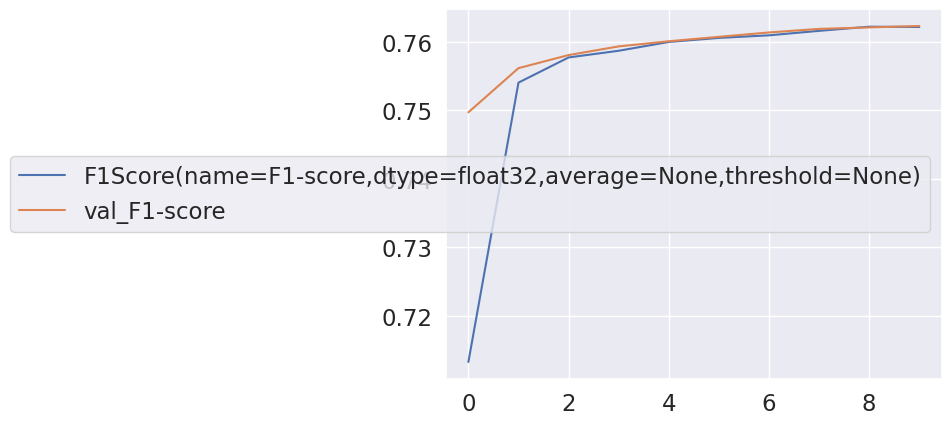

In [10]:
## reshape
if WEIGHT_METHOD != None:
    Y_train_dl, Y_test_dl = reshape_YtoOneHot(Y_train, Y_test)
else:
    Y_train_dl, Y_test_dl = Y_train.copy(), Y_test.copy()
X_train_dl, X_test_dl = X_train.copy(), X_test.copy()

# 모델링
ALGO_NAME = 'MLP'
inputs = Input(shape=(X_train_dl.shape[1],))
hiddens = Dense(256, activation=HIDDEN_ACTIVATION, kernel_regularizer=REGULARIZER)(inputs)
hiddens = Dropout(DROPOUT_RATIO)(hiddens)
hiddens = Dense(128, activation=HIDDEN_ACTIVATION, kernel_regularizer=REGULARIZER)(hiddens)
hiddens = Dropout(DROPOUT_RATIO)(hiddens)
hiddens = Dense(64, activation=HIDDEN_ACTIVATION, kernel_regularizer=REGULARIZER)(hiddens)
hiddens = Dropout(DROPOUT_RATIO)(hiddens)
hiddens = Dense(32, activation=HIDDEN_ACTIVATION, kernel_regularizer=REGULARIZER)(hiddens)
hiddens = Dropout(DROPOUT_RATIO)(hiddens)
output = Dense(Y_train_dl.shape[1], activation=OUTPUT_ACTIVATION)(hiddens)
model = Model(inputs, output)
model.summary()
plot_model(model)
## 데이터 학습하기
model.compile(loss=LOSS, optimizer=OPTIMIZER, metrics=METRICS)
CALLBACK = [EarlyStopping(monitor=MONITOR, mode=MONITOR_MODE, patience=EARLYSTOP_PATIENT,
                          restore_best_weights=True, verbose=1)]
model_fit = model.fit(X_train_dl, Y_train_dl, validation_split=None, validation_data=(X_test_dl, Y_test_dl),
                      batch_size=BATCH_SIZE, epochs=EPOCHS, verbose=VERBOSE,
                      callbacks=CALLBACK)
## 모델 저장
FILE_NAME = os.path.join(work_path, 'Model', 'BA1_'+ALGO_NAME+'.h5')
model.save(FILE_NAME)
## 학습결과 확인
plt.plot(pd.DataFrame(model_fit.history[METRICS[0].name]))
plt.plot(pd.DataFrame(model_fit.history['val_'+METRICS[0].name]))
plt.legend([METRICS[0], 'val_'+METRICS[0].name])
plt.show()

676/676 [==============================] - 1s 1ms/step
Performance: 


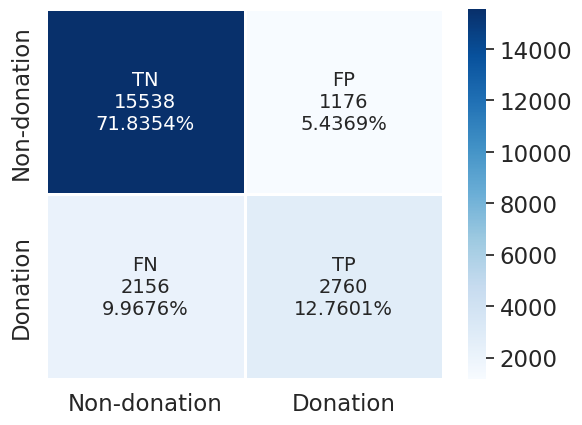

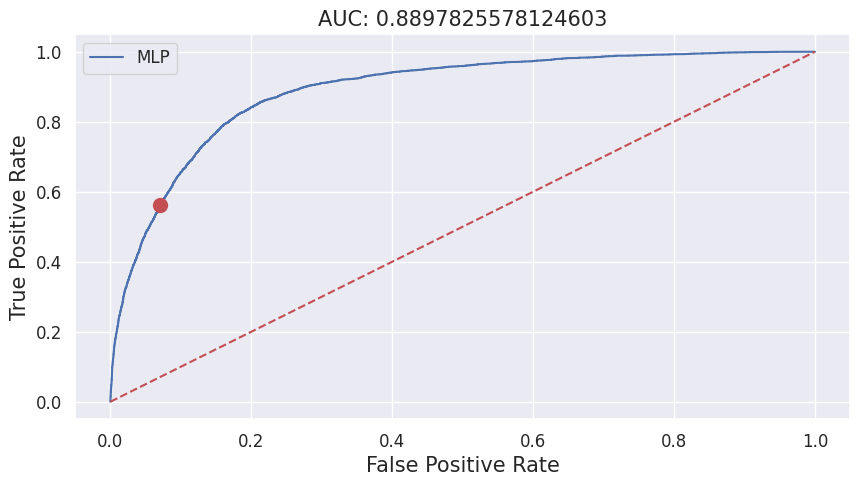

,N,True Positive,True Negative,False Positive,False Negative,Precision,Recall,Specificity,F1-score,Accuracy,Balanced Accuracy,AUC
Test set,21630,2760,15538,1176,2156,0.70122,0.561432,0.92964,0.623588,0.845955,0.745536,0.889783


,N,True Positive,True Negative,False Positive,False Negative,Precision,Recall,Specificity,F1-score,Accuracy,Balanced Accuracy,AUC
Entire population,108150,14289,77369,5803,10689,0.711179,0.572063,0.930229,0.63408,0.847508,0.751146,0.890966


In [11]:
# 베스트 모델 예측
model_mlp = load_model(FILE_NAME)
Score_te_mlp, Score_trte_mlp = prediction_class(model, X_train_dl, Y_train_dl, X_test_dl, Y_test_dl,
                                                LABEL_LIST=LABEL_LIST, ALGO_NAME=ALGO_NAME)
display(model_mlp, Score_te_mlp, Score_trte_mlp)

## 7) CNN

Y_train_reshape: (86520, 1) --> (86520, 2)
Y_test_reshape: (21630, 1) --> (21630, 2)
X_train_reshape: (86520, 148) --> (86520, 148, 1)
X_test_reshape: (21630, 148) --> (21630, 148, 1)
Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 148, 1)]          0         
                                                                 
 conv1d (Conv1D)             (None, 148, 128)          768       
                                                                 
 max_pooling1d (MaxPooling1  (None, 74, 128)           0         
 D)                                                              
                                                                 
 dropout_4 (Dropout)         (None, 74, 128)           0         
                                                                 
 conv1d_1 (Conv1D)           (None, 74, 64)            41024     
       

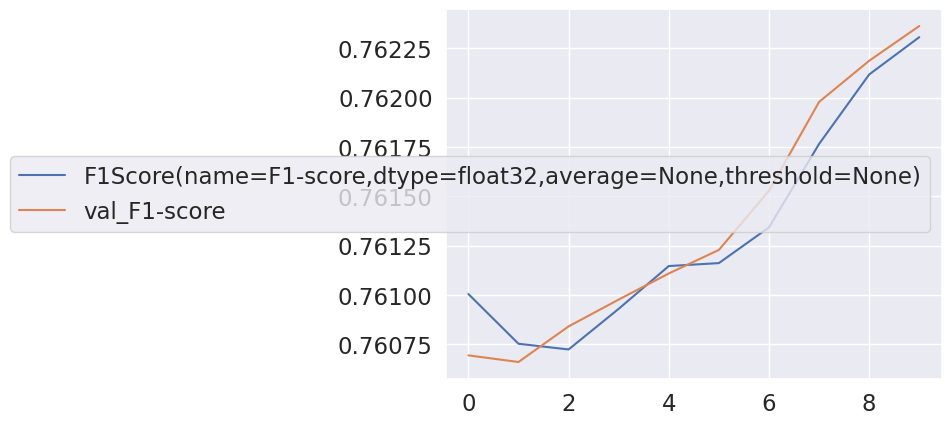

In [12]:
# CNN
## reshape
if WEIGHT_METHOD != None:
    Y_train_dl, Y_test_dl = reshape_YtoOneHot(Y_train, Y_test)
else:
    Y_train_dl, Y_test_dl = Y_train.copy(), Y_test.copy()
X_train_dl, X_test_dl = reshape_X2Dto3D(X_train, X_test)

# 모델링
ALGO_NAME = 'CNN'
inputs = Input(shape=(X_train_dl.shape[1], X_train_dl.shape[2]))
hiddens = Conv1D(128, kernel_size=KERNEL_SIZE, strides=STRIDE, padding=PADDING,
                 activation=HIDDEN_ACTIVATION)(inputs)
hiddens = MaxPooling1D(pool_size=POOL_SIZE, strides=POOL_STRIDE)(hiddens)
hiddens = Dropout(DROPOUT_RATIO)(hiddens)
hiddens = Conv1D(64, kernel_size=KERNEL_SIZE, strides=STRIDE, padding=PADDING,
                 activation=HIDDEN_ACTIVATION)(hiddens)
hiddens = MaxPooling1D(pool_size=POOL_SIZE, strides=POOL_STRIDE)(hiddens)
hiddens = Dropout(DROPOUT_RATIO)(hiddens)
hiddens = Flatten()(hiddens)
hiddens = Dense(32, activation=HIDDEN_ACTIVATION)(hiddens)
hiddens = Dropout(DROPOUT_RATIO)(hiddens)
output = Dense(Y_train_dl.shape[1], activation=OUTPUT_ACTIVATION)(hiddens)
model = Model(inputs, output)
model.summary()
plot_model(model)
## 데이터 학습하기
model.compile(loss=LOSS, optimizer=OPTIMIZER, metrics=METRICS)
CALLBACK = [EarlyStopping(monitor=MONITOR, mode=MONITOR_MODE, patience=EARLYSTOP_PATIENT,
                          restore_best_weights=True, verbose=1)]
model_fit = model.fit(X_train_dl, Y_train_dl, validation_split=None, validation_data=(X_test_dl, Y_test_dl),
                      batch_size=BATCH_SIZE, epochs=EPOCHS, verbose=VERBOSE,
                      callbacks=CALLBACK)
## 모델 저장
FILE_NAME = os.path.join(work_path, 'Model', 'BA1_'+ALGO_NAME+'.h5')
model.save(FILE_NAME)
## 학습결과 확인
plt.plot(pd.DataFrame(model_fit.history[METRICS[0].name]))
plt.plot(pd.DataFrame(model_fit.history['val_'+METRICS[0].name]))
plt.legend([METRICS[0], 'val_'+METRICS[0].name])
plt.show()

676/676 [==============================] - 6s 8ms/step
Performance: 


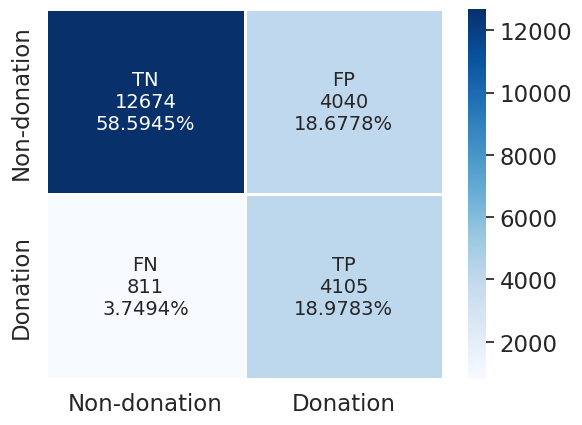

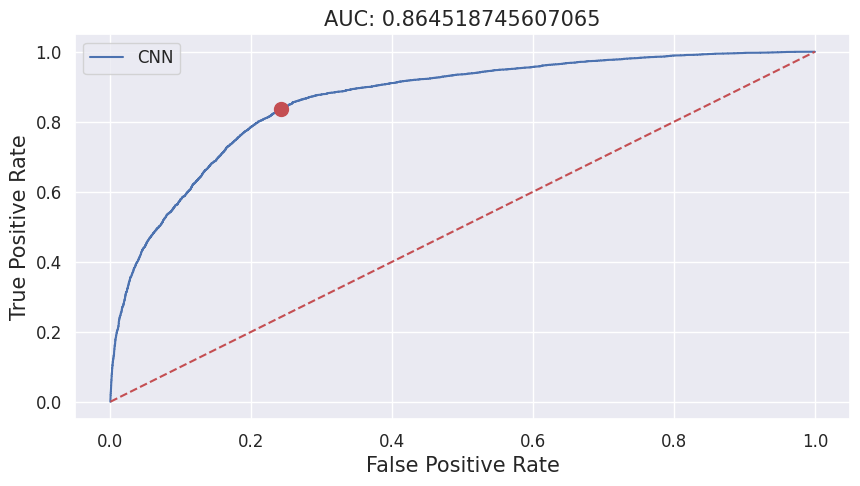

,N,True Positive,True Negative,False Positive,False Negative,Precision,Recall,Specificity,F1-score,Accuracy,Balanced Accuracy,AUC
Test set,21630,4105,12674,4040,811,0.50399,0.835028,0.758286,0.628589,0.775728,0.796657,0.864519


,N,True Positive,True Negative,False Positive,False Negative,Precision,Recall,Specificity,F1-score,Accuracy,Balanced Accuracy,AUC
Entire population,108150,21013,63083,20089,3965,0.51124,0.84126,0.758464,0.635987,0.777587,0.799862,0.868694


In [13]:
# 베스트 모델 예측
model_mlp = load_model(FILE_NAME)
Score_te_mlp, Score_trte_mlp = prediction_class(model, X_train_dl, Y_train_dl, X_test_dl, Y_test_dl,
                                                LABEL_LIST=LABEL_LIST, ALGO_NAME=ALGO_NAME)
display(model_mlp, Score_te_mlp, Score_trte_mlp)

## 8) Performance Comparison

In [14]:
folder_location = os.path.join(os.getcwd(),'Result')
prediction_summary(folder_location=folder_location,
                   algonames=['Logistic Regression', 'Random Forest', 'XGBoost', 'LGBM', 'CatBoost', 'MLP', 'CNN'],
                   colidx=list(range(7,14)), axis=0, highlight_direct='max')


,Dataset,Algorithm,N,True Positive,True Negative,False Positive,False Negative,Precision,Recall,Specificity,F1-score,Accuracy,Balanced Accuracy,AUC
0,Test set,Logistic Regression,21630,4108,13465,3249,808,0.558380,0.835639,0.805612,0.669437,0.812436,0.820625,0.889240
1,Test set,Random Forest,21630,2420,15787,927,2496,0.723036,0.492270,0.944538,0.585744,0.841748,0.718404,0.886311
2,Test set,XGBoost,21630,3977,13747,2967,939,0.572725,0.808991,0.822484,0.670658,0.819417,0.815738,0.886708
3,Test set,CatBoost,21630,4004,13584,3130,912,0.561256,0.814483,0.812732,0.664564,0.813130,0.813608,0.885344
4,Test set,MLP,21630,2760,15538,1176,2156,0.701220,0.561432,0.929640,0.623588,0.845955,0.745536,0.889783
5,Test set,CNN,21630,4105,12674,4040,811,0.503990,0.835028,0.758286,0.628589,0.775728,0.796657,0.864519


,Dataset,Algorithm,N,True Positive,True Negative,False Positive,False Negative,Precision,Recall,Specificity,F1-score,Accuracy,Balanced Accuracy,AUC
0,Entire population,Logistic Regression,108150,20953,66599,16573,4025,0.558360,0.838858,0.800738,0.670453,0.809542,0.819798,0.890385
1,Entire population,Random Forest,108150,22482,82245,927,2496,0.960400,0.900072,0.988854,0.929258,0.968350,0.944463,0.990620
2,Entire population,XGBoost,108150,22079,70128,13044,2899,0.628619,0.883938,0.843168,0.734730,0.852584,0.863553,0.934898
3,Entire population,CatBoost,108150,21520,68371,14801,3458,0.592495,0.861558,0.822043,0.702132,0.831170,0.841801,0.914937
4,Entire population,MLP,108150,14289,77369,5803,10689,0.711179,0.572063,0.930229,0.634080,0.847508,0.751146,0.890966
5,Entire population,CNN,108150,21013,63083,20089,3965,0.511240,0.841260,0.758464,0.635987,0.777587,0.799862,0.868694


# Feature Explanation

## 1) Best Model

Performance: 


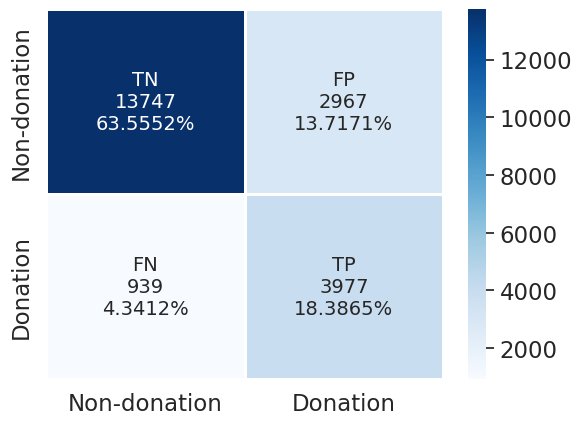

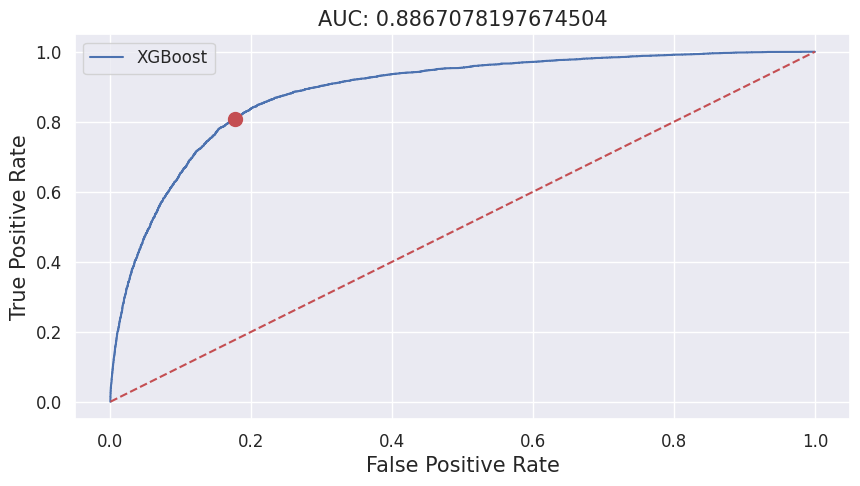

,N,True Positive,True Negative,False Positive,False Negative,Precision,Recall,Specificity,F1-score,Accuracy,Balanced Accuracy,AUC
Test set,21630,3977,13747,2967,939,0.572725,0.808991,0.822484,0.670658,0.819417,0.815738,0.886708


,N,True Positive,True Negative,False Positive,False Negative,Precision,Recall,Specificity,F1-score,Accuracy,Balanced Accuracy,AUC
Entire population,108150,22079,70128,13044,2899,0.628619,0.883938,0.843168,0.73473,0.852584,0.863553,0.934898


In [15]:
# XGBoost
model = XGBClassifier(n_estimators=100,
                      scale_pos_weight=Y_train.value_counts()[0]/Y_train.value_counts()[1],   # binary
                      random_state=123)
model.fit(X_train, Y_train)

# Prediction & Evaluation
Score_te, Score_trte = prediction_class(model, X_train, Y_train, X_test, Y_test,
                                        LABEL_LIST=LABEL_LIST, ALGO_NAME='XGBoost')
display(Score_te, Score_trte)

## 2) SHAP

In [16]:
# Visualization
import matplotlib
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
## 한글 폰트 설치
!apt-get update -qq
!apt-get install fonts-nanum* -qq
## NanumGothic 폰트 경로 지정
fm.fontManager.addfont('/usr/share/fonts/truetype/nanum/NanumGothic.ttf')
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_prop = fm.FontProperties(fname=font_path)
## 한글 폰트 설정
matplotlib.rcParams['font.family'] = font_prop.get_name()
plt.rc('font', family='NanumGothic')
sns.set(font=font_prop.get_name())
## 마이너스 표시 설정
plt.rcParams['axes.unicode_minus'] = False

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)


In [17]:
# Explanation
explanation_SHAP_KK(model, X_train, X_test, X_colname,
                    MAX_DISPLAY=MAX_DISPLAY, model_type='tree',
                    link=OUTPUT_TYPE, sample_size=1,
                    sample_size_1000=100,
                    plot_interaction=True)

Output hidden; open in https://colab.research.google.com to view.

| **Positive Effect** |  | **Negative Effect** |  |
|:---:|:---:|:---:|:---:|
| **Train (Past)** | **Test (Future)** | **Train (Past)** | **Test (Future)** |
| 향후기부의사여부 | 향후기부의사여부 | 분류코드_가구소득1코드 | 분류코드_가구소득1코드 |
| 단체참여_종교단체여부 | 단체참여_종교단체여부 | 레저시설_관광명소유적지국립공원이용횟수 | 레저시설_관광명소유적지국립공원이용횟수 |
| 독서여부 | 독서여부 | 국내관광여행_당일여행횟수 | 국내관광여행_당일여행횟수 |
| 자원봉사활동여부 | 자원봉사활동여부 | 분류코드_가구원수 | 분류코드_가구원수 |
| 노후방법준비_본인노후준비여부 | 노후방법준비_본인노후준비여부 | 생활여건변화_전반적생활여건코드 | 생활여건변화_전반적생활여건코드 |
| - | 주관적소득수준코드 | 고용안정성코드 | 고용안정성코드 |
| 분류코드_가구소득1코드 | 분류코드_가구소득1코드 | 분류코드_세대구분코드 | 분류코드_세대구분코드 |
| 교육정도코드 | 교육정도코드 | 자식세대_계층이동코드 | 자식세대_계층이동코드 |
| 혼인상태코드 | 혼인상태코드 | 신문_인터넷구독여부 | 신문_인터넷구독여부 |
| 노후사회적관심사코드 | 노후사회적관심사코드 | 생활여견변화_사회보장제도코드 | - |
| 국내관광여행_숙박여행횟수 | 국내관광여행_숙박여행횟수 |  |  |
| 장애인복지사업견해코드 | 장애인복지사업견해코드 |  |  |
| 분류코드_연령4코드 | 분류코드_연령4코드 |  |  |
| 가구소득코드 | 가구소득코드 |  |  |
| 여가활용만족도코드 | 여가활용만족도코드 |  |  |
| 생활여건변화_보건의료서비스코드 | 생활여건변화_보건의료서비스코드 |  |  |
| - | 단체참여_시민사회단체여부 |  |  |
| 사회장애인차별정도코드 | 사회장애인차별정도코드 |  |  |
| 장애인관련시설견해코드 | 장애인관련시설견해코드 |  |  |
| - | 부채변화코드 |  |  |
| 분류코드_교육정도코드 | 분류코드_교육정도코드 |  |  |
| 소득만족도코드 | 소득만족도코드 |  |  |
| 여성취업시기코드_1.0 | 여성취업시기코드_1.0 |  |  |
| - | 주관적만족감코드 |  |  |